<a href="https://colab.research.google.com/github/mwebazejunior/mwebazejunior/blob/main/Project_1_Part_5_(Core)_Mwebaze_Junior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_data ='/content/drive/MyDrive/Week2_data/sales_predictions_2023.csv'
df = pd.read_csv(sales_data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [99]:
# Check for duplicates
duplicates = df.duplicated()

# Display rows with duplicates, if any
duplicate_rows = df[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

# Alternatively, you can drop duplicates to remove them from the dataset
# cleaned_x_train = x_train.drop_duplicates()


Duplicate Rows:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Number of duplicates: 0


In [100]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Check for unexpected or inconsistent values in each numeric column
for col in numeric_columns:
    # Convert the column to numeric (errors='coerce' will convert non-numeric values to NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Find rows with non-numeric values
    inconsistent_values = df[col].loc[df[col].apply(lambda x: isinstance(x, str))]
    if not inconsistent_values.empty:
        print(f"Inconsistent values in {col}:")
        print(inconsistent_values)
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [101]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check unique categories in each categorical column
for col in categorical_columns:
    unique_categories = df[col].unique()
    print(f"Unique categories in {col}: {unique_categories}")

#Identify inconsistencies or variations in category labels (if any)
# For example, you might find variations like 'active', 'Active', 'ACTIVE' for the same category

#Standardize or correct category labels as needed
# For example, you can convert all category labels to uppercase
for col in categorical_columns:
    df[col] = df[col].str.upper()  # Convert to uppercase

# Check the DataFrame after standardizing category labels
#print("\nDataFrame after standardizing category labels:")
#print(df)

Unique categories in Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique categories in Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique categories in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique categories in Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique categories in Outlet_Size: ['Medium' nan 'High' 'Small']
Unique categories in Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Unique categories in Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [45]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [49]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [105]:
# Convert column 'Outlet_Size' to numeric, converting non-numeric values to NaN
#df['Outlet_Size'] = pd.to_numeric(df['Outlet_Size'], errors='coerce')

# Calculate the frequency of each value in column 'B'
value_counts_Outlet_Size = df['Outlet_Size'].value_counts()

# Find the value with the highest frequency
most_frequent_Outlet_Size = value_counts_Outlet_Size.idxmax()

# Replace NaN values in column 'B' with the most frequent value
df['Outlet_Size'].fillna(most_frequent_Outlet_Size, inplace=True)

In [108]:
# Drop column 'Item_Identifier' from the DataFrame
if 'Item_Identifier' in df.columns:
    # Drop 'Item_Identifier' column from the DataFrame
    df.drop('Item_Identifier', axis=1, inplace=True)
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [119]:
# Define features and target
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

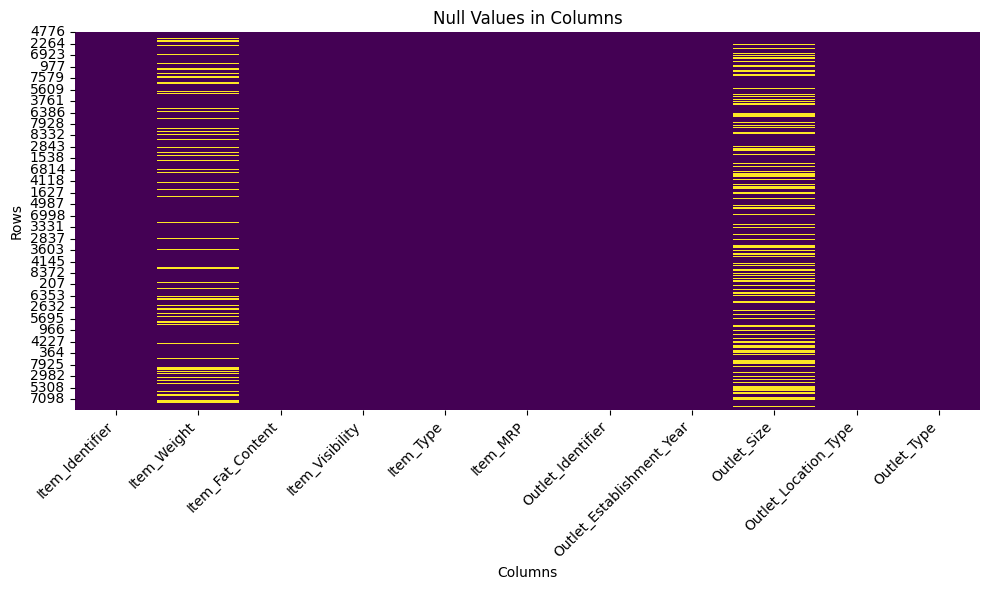

In [120]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [122]:
# Convert column 'Item_Weight' to numeric, converting non-numeric values to NaN
X_train['Item_Weight'] = pd.to_numeric(X_train['Item_Weight'], errors='coerce')

# Calculate the median of the numeric column
median_Item_Weight = X_train['Item_Weight'].median()

# Replace NaN values in column 'B' with the median
X_train['Item_Weight'].fillna(median_Item_Weight, inplace=True)

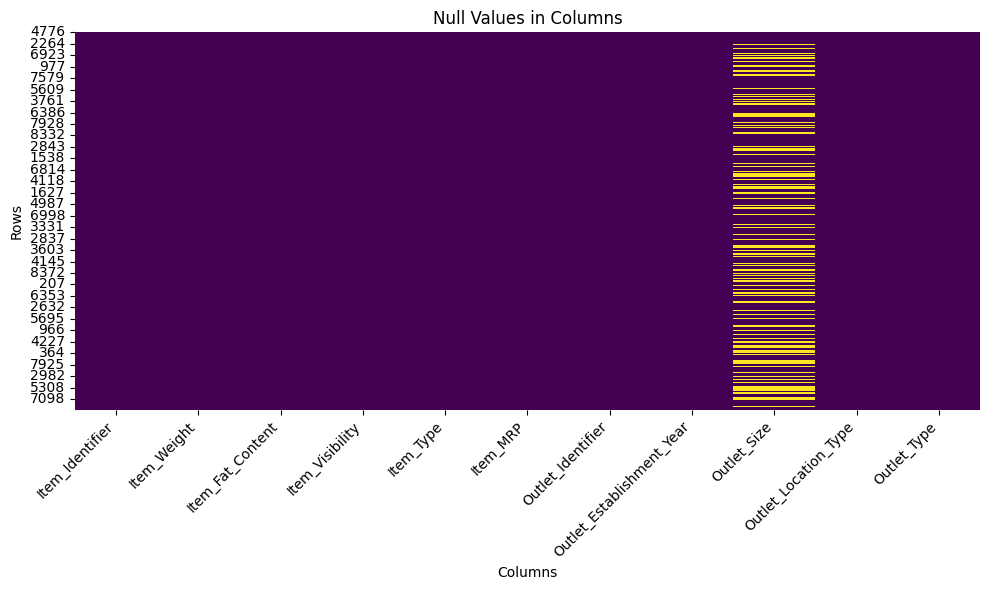

In [125]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [126]:
# Convert column 'Outlet_Size' to numeric, converting non-numeric values to NaN
#df['Outlet_Size'] = pd.to_numeric(df['Outlet_Size'], errors='coerce')

# Calculate the frequency of each value in column 'B'
value_counts_Outlet_Size = X_train['Outlet_Size'].value_counts()

# Find the value with the highest frequency
most_frequent_Outlet_Size = value_counts_Outlet_Size.idxmax()

# Replace NaN values in column 'B' with the most frequent value
X_train['Outlet_Size'].fillna(most_frequent_Outlet_Size, inplace=True)

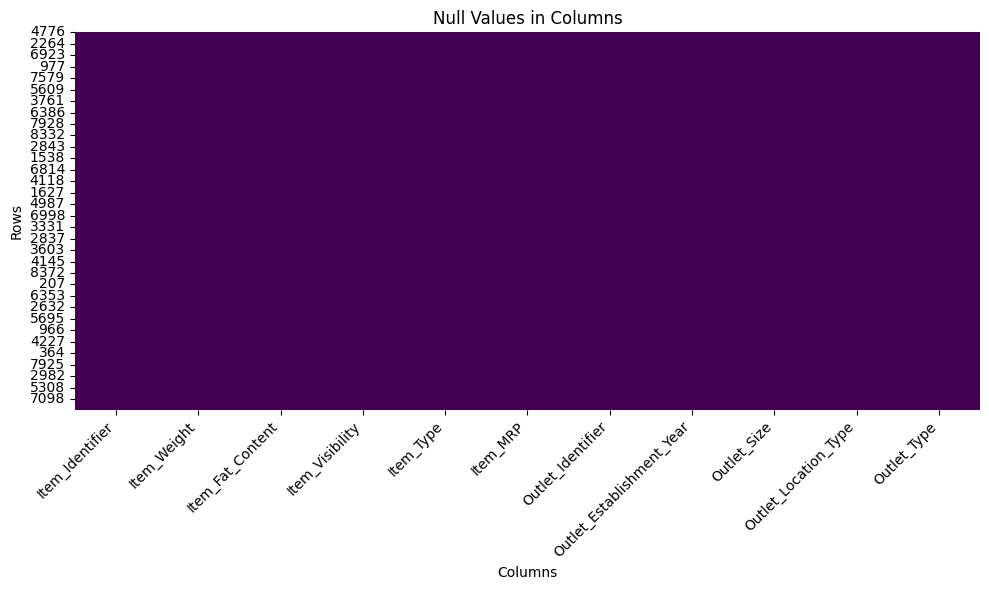

In [127]:
import seaborn as sns

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [129]:
# Check for null values
null_values = X_train.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Display columns with null values, if any
total_null_count = null_counts.sum()
print("Total number of null values:", total_null_count)


Total number of null values: 0


In [115]:
# Making a numeric tuple for ColumnTransformer
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
numeric_columns = X_train.select_dtypes("number").columns
# Instantiate the imputer object from the SimpleImputer class with strategy 'median'
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Fit the imputer object on the numeric training data with .fit()
impute_median.fit(X_train[numeric_columns])
# Transform the training data
#X_train_num_imputed = impute_median.transform(X_train[numeric_columns])
X_train_processed = impute_median.transform(X_train[numeric_columns])
# Transfrom the testing data
#X_test_num_imputed = impute_median.transform(X_test[numeric_columns])
X_test_processed = impute_median.transform(X_test[numeric_columns])
#==============================================================================
#Create a OneHotEncoder for one-hot encoding the categorical columns.
# Identify categorical columns
categorical_columns = X_train.select_dtypes(exclude=['number']).columns
#categorical_columns = df.select_dtypes(include=['object']).columns
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(X_train[categorical_columns])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([X_train, encoded_df], axis=1)
df_encoded

# Drop the original categorical columns from the DataFrame
df_encoded.drop(categorical_columns, axis=1, inplace=True)

print("Original x_train_data:")
print(X_train)
print("\nEncoded x_train_data:")
print(df_encoded)
#===============================================================================================================
# Make a numeric preprocessing pipeline
numeric_pipeline = make_pipeline(impute_median, scaler)
numeric_pipeline

# Pipeline 1: For numeric columns
numeric_pipeline = make_pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
numeric_pipeline_tuple = ('numeric_pipeline', numeric_pipeline, numeric_columns)
# Pipeline 2: For categorical columns
categorical_pipeline = make_pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
categorical_pipeline_tuple = ('categorical_pipeline', categorical_pipeline, categorical_columns)

# Pipeline 3: For both numeric and categorical columns (using ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)
column_transformer_tuple = ('Column_Transformer', preprocessor, numeric_columns, categorical_columns)

# Print the tuples
print("Pipeline 1:", numeric_pipeline_tuple)
print("Pipeline 2:", categorical_pipeline_tuple)
print("Pipeline 3:", column_transformer_tuple)


Original x_train_data:
      Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
4776       16.350          LOW FAT         0.029565              HOUSEHOLD   
7510       15.250          REGULAR         0.000000            SNACK FOODS   
5828       12.350          REGULAR         0.158716                   MEAT   
5327        7.975          LOW FAT         0.014628           BAKING GOODS   
4810       19.350          LOW FAT         0.016645           FROZEN FOODS   
...           ...              ...              ...                    ...   
5734        9.395          REGULAR         0.286345  FRUITS AND VEGETABLES   
5191       15.600          LOW FAT         0.117575           FROZEN FOODS   
5390       17.600          LOW FAT         0.018944     HEALTH AND HYGIENE   
860        20.350          LOW FAT         0.054363            SNACK FOODS   
7270       16.350               LF         0.016993              HOUSEHOLD   

      Item_MRP Outlet_Identifier  Outlet

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
